In [42]:
#Exercise 1: Patricia Marasigan, IE300 lab BD4 

import pandas as pd
import numpy as np
import csv

# Read data using the pandas package and output results.
file  = 'FlightTime.csv'
df = pd.read_csv(file)
df.head()

,Flight Date,Carrier,Flight Number,Origin,Destination,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Flight Time
0,11/1/2015,AA,111,ORD,LAX,1709.0,-1.0,1952.0,2.0,283
1,11/1/2015,AA,1092,ORD,LAX,2021.0,-4.0,2243.0,-20.0,262
2,11/1/2015,AA,1081,ORD,LAX,841.0,-4.0,1052.0,-33.0,251
3,11/1/2015,AA,1243,ORD,LAX,705.0,-5.0,919.0,-31.0,254
4,11/1/2015,AA,1358,ORD,LAX,1508.0,-2.0,1739.0,-10.0,271


In [43]:
# Identify incomplete rows
df.count()

Flight Date        743
Carrier            743
Flight Number      743
Origin             743
Destination        743
Departure Time     731
Departure Delay    731
Arrival Time       729
Arrival Delay      729
Flight Time        743
dtype: int64

In [45]:
# Drop all rows with missing information
df.dropna(how='any')

,Flight Date,Carrier,Flight Number,Origin,Destination,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Flight Time
0,11/1/2015,AA,111,ORD,LAX,1709.0,-1.0,1952.0,2.0,283
1,11/1/2015,AA,1092,ORD,LAX,2021.0,-4.0,2243.0,-20.0,262
2,11/1/2015,AA,1081,ORD,LAX,841.0,-4.0,1052.0,-33.0,251
3,11/1/2015,AA,1243,ORD,LAX,705.0,-5.0,919.0,-31.0,254
4,11/1/2015,AA,1358,ORD,LAX,1508.0,-2.0,1739.0,-10.0,271
...,...,...,...,...,...,...,...,...,...,...
737,11/30/2015,UA,793,ORD,LAX,1610.0,3.0,1827.0,-16.0,257
738,11/30/2015,UA,1098,ORD,LAX,611.0,-5.0,829.0,-25.0,258
739,11/30/2015,UA,1440,ORD,LAX,2247.0,97.0,101.0,75.0,254
740,11/30/2015,VX,231,ORD,LAX,732.0,32.0,957.0,22.0,265


In [46]:
# Verify dropped rows
df.count()

Flight Date        729
Carrier            729
Flight Number      729
Origin             729
Destination        729
Departure Time     729
Departure Delay    729
Arrival Time       729
Arrival Delay      729
Flight Time        729
dtype: int64

In [51]:
#Remove faulty times <230 minutes
df.drop(df[df['Flight Time'] < 230].index, inplace = True)

In [59]:
# Calculate the final number of observations in dataset
index = df.index
print('Total Number of Observations:' , len(index) )

Total Number of Observations: 729


In [64]:
#Calculate the target flight time
d = 1741.16 
l_ori = -87.90
l_des = -118.41
TFT = .117 * d + .517 * (l_ori - l_des) + 20
print('Target Flight Time:',TFT)

Target Flight Time: 239.48939000000001


In [65]:
#Calculate typical time (TT)
TT = TFT + df['Departure Delay'].mean() + df['Arrival Delay'].mean()
print('Typical Time:',TT)

Typical Time: 263.1217631138546


In [117]:
#Calculate Average Flight Time (AFT), and Time Added (TA) for each airline:AA, F9,NK, UA, VX

groupby_AFT = df.groupby('Carrier')['Flight Time'].mean()
TA = groupby_AFT - TT
smallest_TA = groupby_TA.min()

#Report results

print('Average Flight Time by ' + str(groupby_AFT))
print('Time Added by '+ str(TA))
print('Least time added: ' +str(smallest_TA) )

Average Flight Time by Carrier
AA    267.375439
F9    275.310345
NK    267.559322
UA    269.174497
VX    265.913793
Name: Flight Time, dtype: float64
Time Added by Carrier
AA     4.253675
F9    12.188582
NK     4.437559
UA     6.052734
VX     2.792030
Name: Flight Time, dtype: float64
Least time added: 2.7920299895936296


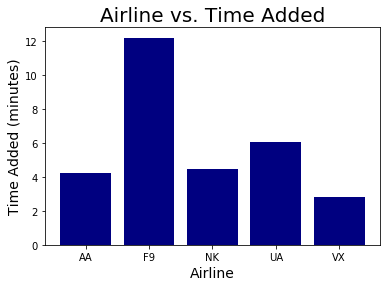

In [146]:
#Exercise 2

import matplotlib.pyplot as plt

x = ['AA' , 'F9' , 'NK' , 'UA' , 'VX']
y = [4.253675 , 12.188582 , 4.437559 , 6.052734 , 2.792030]

plt.bar(x,y, color = 'navy')
plt.xlabel('Airline' , size=14)
plt.ylabel('Time Added (minutes)' , size=14)
plt.title('Airline vs. Time Added' , size=20)
plt.show()